Part - 1:
===========

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torch.utils.data import DataLoader, TensorDataset
import time
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, auc
import pickle

In [2]:
df = pd.read_csv('dataset.csv')
print(df.describe())

               f3      target
count  766.000000  766.000000
mean    69.118799    0.349869
std     19.376901    0.477240
min      0.000000    0.000000
25%     62.500000    0.000000
50%     72.000000    0.000000
75%     80.000000    1.000000
max    122.000000    1.000000


In [3]:
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in f1: ['6' '1' '8' '0' '5' '3' '10' '2' '4' '7' '9' '11' '13' '15' '17' '12'
 '14' 'c']
Unique values in f2: ['148' '85' '183' '89' '137' '116' '78' '115' '197' '125' '110' '168'
 '139' '189' '166' '100' '118' '107' '103' '126' '99' '196' '119' '143'
 '147' '97' '145' '117' '109' '158' '88' '92' '122' '138' '102' '90' '111'
 '180' '133' '106' '171' '159' '146' '71' '105' '101' '176' '150' '73'
 '187' '84' '44' '141' '114' '95' '129' '79' '0' '62' '131' '112' '113'
 '74' '83' '136' '80' '123' '81' '134' '142' '144' '93' '163' '151' '96'
 '155' '76' '160' '124' '162' '132' '120' '173' '170' '128' '108' '154'
 '57' '156' '153' '188' '152' '104' '87' '75' '179' '130' '194' '181'
 '135' '184' '140' '177' '164' '91' '165' '86' '193' '191' '161' '167'
 '77' '182' '157' '178' '61' '98' '127' '82' '72' '172' '94' '175' '195'
 '68' '186' '198' '121' '67' '174' '199' '56' '169' '149' '65' '190' 'f']
Unique values in f3: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  

In [4]:
# we see that there are alphabets in numeric columns so we replace them with mean of that respective column
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True)
df.tail

C:\Users\ruthv\AppData\Local\Temp\ipykernel_18464\399973658.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


<bound method NDFrame.tail of             f1     f2  f3         f4          f5        f6        f7  target
0     6.000000  148.0  72  35.000000    0.000000  33.60000  0.627000       1
1     1.000000   85.0  66  29.000000    0.000000  26.60000  0.351000       0
2     8.000000  183.0  64   0.000000    0.000000  23.30000  0.672000       1
3     1.000000   89.0  66  23.000000   94.000000  28.10000  0.167000       0
4     0.000000  137.0  40  35.000000  168.000000  43.10000  2.288000       1
..         ...    ...  ..        ...         ...       ...       ...     ...
761   9.000000   89.0  62   0.000000    0.000000  22.50000  0.472128       0
762  10.000000  101.0  76  48.000000  180.000000  31.99817  0.171000       0
763   2.000000  122.0  70  27.000000   80.091503  36.80000  0.340000       0
764   3.849673  121.0  72  23.000000  112.000000  26.20000  0.245000       0
765   1.000000  126.0  60  20.542484    0.000000  30.10000  0.349000       1

[766 rows x 8 columns]>

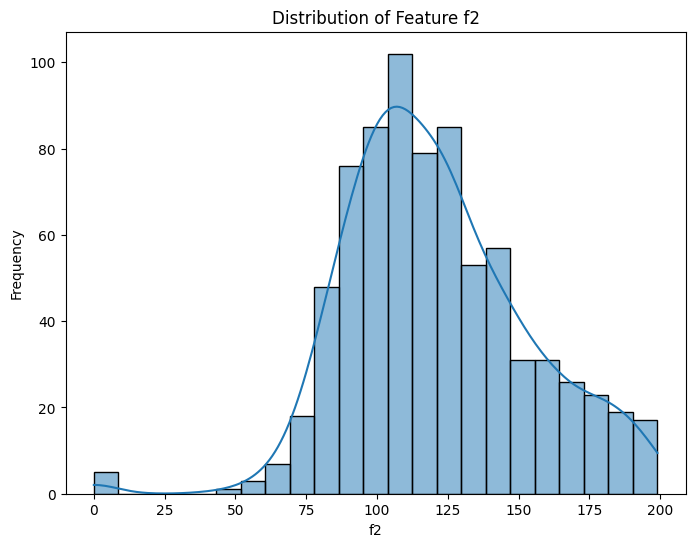

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(df['f2'], kde=True)
plt.title('Distribution of Feature f2')
plt.xlabel('f2')
plt.ylabel('Frequency')
plt.show()

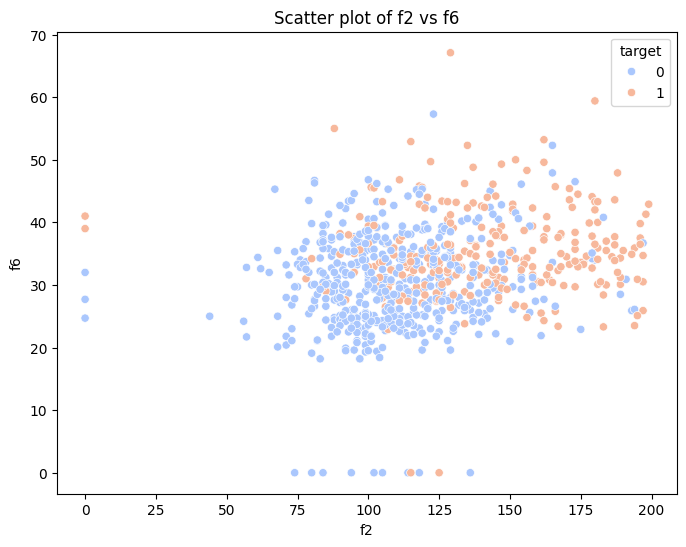

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='f2', y='f6', hue='target', palette='coolwarm')
plt.title('Scatter plot of f2 vs f6')
plt.xlabel('f2')
plt.ylabel('f6')
plt.show()

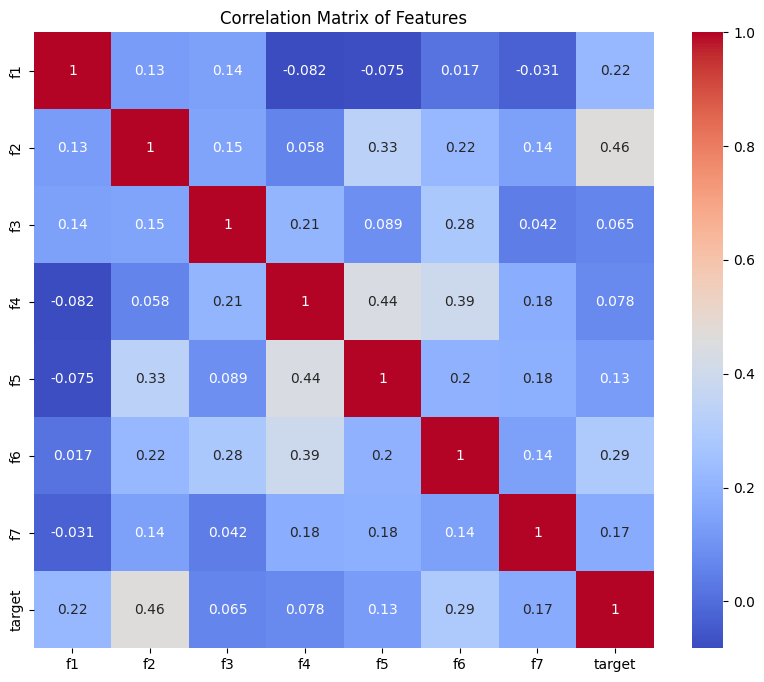

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [8]:
scaler = StandardScaler()
df1 = df.drop('target', axis=1)
column = df1.columns
df1[column] = scaler.fit_transform(df1[column])
df1['target'] = df['target']
df1.tail

<bound method NDFrame.tail of                f1        f2        f3            f4        f5            f6  \
0    6.382139e-01  0.849057  0.148790  9.070150e-01 -0.695096  2.030729e-01   
1   -8.457789e-01 -1.125480 -0.161060  5.305956e-01 -0.695096 -6.843559e-01   
2    1.231811e+00  1.946022 -0.264343 -1.288765e+00 -0.695096 -1.102715e+00   
3   -8.457789e-01 -1.000113 -0.161060  1.541762e-01  0.120709 -4.941926e-01   
4   -1.142577e+00  0.504297 -1.503740  9.070150e-01  0.762938  1.407440e+00   
..            ...       ...       ...           ...       ...           ...   
761  1.528610e+00 -1.000113 -0.367626 -1.288765e+00 -0.695096 -1.204136e+00   
762  1.825408e+00 -0.624010  0.355356  1.722590e+00  0.867083  4.503972e-16   
763 -5.489804e-01  0.034169  0.045507  4.051224e-01  0.000000  6.087546e-01   
764  1.318050e-16  0.002827  0.148790  1.541762e-01  0.276927 -7.350661e-01   
765 -8.457789e-01  0.159536 -0.470909  2.228851e-16 -0.695096 -2.406415e-01   

               f7  ta

In [9]:
X = df.drop('target', axis=1)
Y = df['target']
oversampler = RandomOverSampler(random_state=42)
X, Y = oversampler.fit_resample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.175, random_state=42)

In [10]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
Y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
print("X train tensor size: ", X_train_tensor.shape)
print("Y train tensor size: ", Y_train_tensor.shape)
print("X val tensor size: ", X_val_tensor.shape)
print("Y val tensor size: ", Y_val_tensor.shape)
print("X test tensor size: ", X_test_tensor.shape)
print("Y test tensor size: ", Y_test_tensor.shape)

X train tensor size:  torch.Size([697, 7])
Y train tensor size:  torch.Size([697])
X val tensor size:  torch.Size([149, 7])
Y val tensor size:  torch.Size([149])
X test tensor size:  torch.Size([150, 7])
Y test tensor size:  torch.Size([150])


In [11]:
class BaseNN(nn.Module):
    def __init__(self, input, hidden, output):
        super(BaseNN, self).__init__()
        self.fc1 = nn.Linear(input, hidden)
        self.fc2 = nn.Linear(hidden, hidden)
        self.fc3 = nn.Linear(hidden, hidden)
        self.fc4 = nn.Linear(hidden, output)
        self.relu = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        return x


In [12]:
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 1
model = BaseNN(input_size, hidden_size, output_size)
loss_function = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.007)

# Hyperparameters
total_epochs = 300
batch_size = 64
best_val_loss = float('inf')

train_dataloader = DataLoader(TensorDataset(X_train_tensor, Y_train_tensor), batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(TensorDataset(X_val_tensor, Y_val_tensor), batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(TensorDataset(X_test_tensor, Y_test_tensor), batch_size=batch_size, shuffle=False)

# loss and accuracy values lists
train_losses = []
val_losses = []
test_losses = []
train_accuracies = []
val_accuracies = []
test_accuracies = []

start_time = time.time()
for epoch in range(total_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    
    for inputs, labels in train_dataloader:
        outputs = model(inputs)
        loss = loss_function(outputs, labels.unsqueeze(1).float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        predictions = torch.round(torch.sigmoid(outputs))
        correct_train += (predictions.squeeze(1) == labels).sum().item()

    train_loss = running_loss / len(train_dataloader.dataset)
    train_accuracy = correct_train / len(train_dataloader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_dataloader:
            val_outputs = model(val_inputs)
            val_loss += loss_function(val_outputs, val_labels.unsqueeze(1).float()).item() * val_inputs.size(0)
            val_predictions = torch.round(torch.sigmoid(val_outputs))
            correct_val += (val_predictions.squeeze(1) == val_labels).sum().item()

    val_loss /= len(val_dataloader.dataset)
    val_accuracy = correct_val / len(val_dataloader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f"Epoch {epoch+1}/{total_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, "
          f"Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'model_part1.pkl')
    
    # Testing
    model.eval()
    y_true = []
    y_pred = []
    test_loss = 0.0

    with torch.no_grad():
        for test_inputs, test_labels in test_dataloader:
            test_outputs = model(test_inputs)
            loss = loss_function(test_outputs, test_labels.unsqueeze(1).float())
            test_loss += loss.item() * test_inputs.size(0)
            predictions = torch.round(torch.sigmoid(test_outputs))
            y_true.extend(test_labels.tolist())
            y_pred.extend(predictions.squeeze(1).tolist())

    test_loss /= len(test_dataloader.dataset)
    test_losses.append(test_loss)
    test_accuracy = accuracy_score(y_true, y_pred)
    test_accuracies.append(test_accuracy)

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{total_epochs}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
end_time = time.time()
print(f"Training completed in: {(end_time - start_time) / 60:.2f} minutes")

model.load_state_dict(torch.load('model_part1.pkl'))

Epoch 1/300, Training Loss: 2.0227, Validation Loss: 0.7064, Training Accuracy: 0.5237, Validation Accuracy: 0.5235
Epoch 2/300, Training Loss: 0.7960, Validation Loss: 0.6829, Training Accuracy: 0.5022, Validation Accuracy: 0.6174
Epoch 3/300, Training Loss: 0.7153, Validation Loss: 0.6852, Training Accuracy: 0.5294, Validation Accuracy: 0.5839
Epoch 4/300, Training Loss: 0.6841, Validation Loss: 0.6845, Training Accuracy: 0.5352, Validation Accuracy: 0.6711
Epoch 5/300, Training Loss: 0.6980, Validation Loss: 0.6821, Training Accuracy: 0.5681, Validation Accuracy: 0.6711
Epoch 6/300, Training Loss: 0.6808, Validation Loss: 0.6810, Training Accuracy: 0.5524, Validation Accuracy: 0.6309
Epoch 7/300, Training Loss: 0.6782, Validation Loss: 0.6776, Training Accuracy: 0.5739, Validation Accuracy: 0.5906
Epoch 8/300, Training Loss: 0.6746, Validation Loss: 0.6801, Training Accuracy: 0.5653, Validation Accuracy: 0.5839
Epoch 9/300, Training Loss: 0.6807, Validation Loss: 0.6781, Training Ac

C:\Users\ruthv\AppData\Local\Temp\ipykernel_18464\3853573491.py:93: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_part1.pkl'))


<All keys matched successfully>

In [13]:
# Evaluation on the test data
model.eval()
y_true = []
y_pred = []
test_loss = 0.0

with torch.no_grad():
    for test_inputs, test_labels in test_dataloader:
        test_outputs = model(test_inputs)
        loss = loss_function(test_outputs, test_labels.unsqueeze(1).float())
        test_loss += loss.item() * test_inputs.size(0)
        predictions = torch.round(torch.sigmoid(test_outputs))
        y_true.extend(test_labels.tolist())
        y_pred.extend(predictions.squeeze(1).tolist())

test_loss /= len(test_dataloader.dataset)
test_accuracy = accuracy_score(y_true, y_pred)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

y_true = torch.tensor(y_true)
y_pred = torch.tensor(y_pred)

accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Test Loss: 0.5318, Test Accuracy: 0.7600
Test Accuracy: 0.7600
Test Precision: 0.7966
Test Recall: 0.6620
Test F1 Score: 0.7231


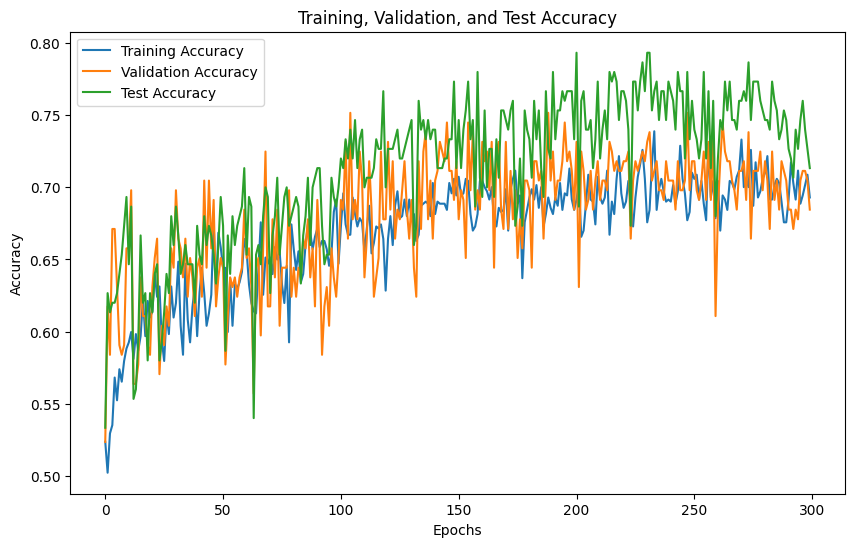

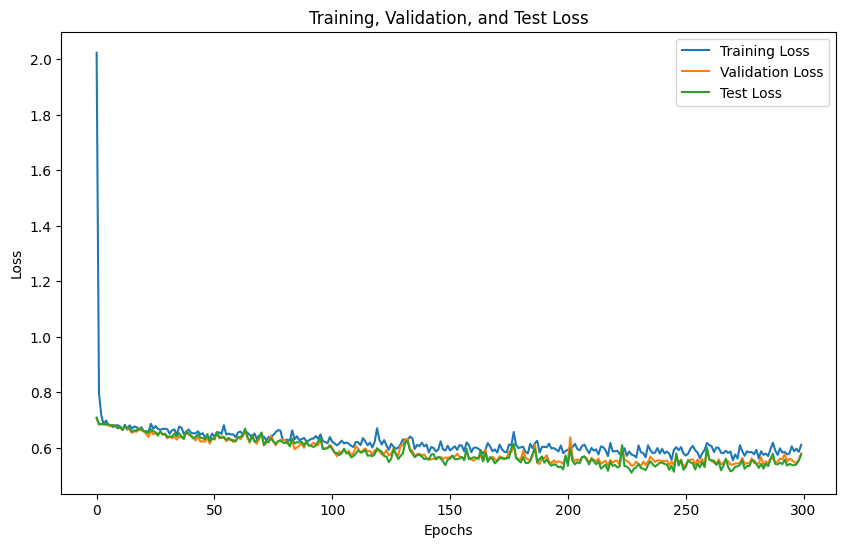

In [14]:
# Accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(range(total_epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(total_epochs), val_accuracies, label='Validation Accuracy')
plt.plot(range(total_epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()

# Loss graph
plt.figure(figsize=(10, 6))
plt.plot(range(total_epochs), train_losses, label='Training Loss')
plt.plot(range(total_epochs), val_losses, label='Validation Loss')
plt.plot(range(total_epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()


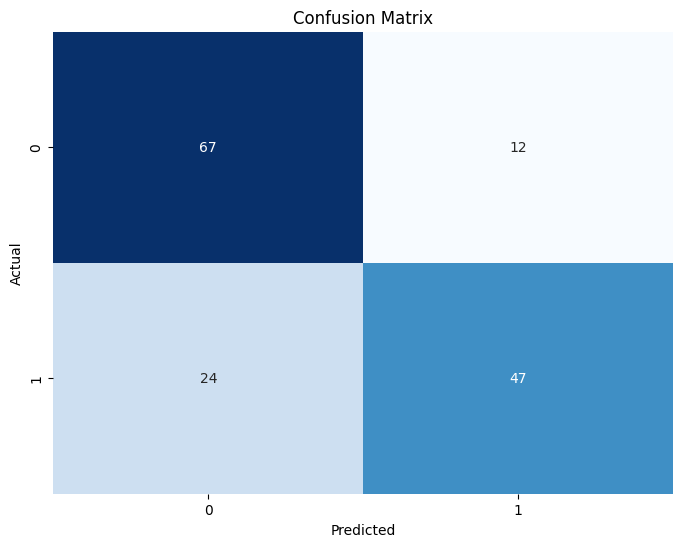

In [15]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\ruthv\AppData\Local\Temp\ipykernel_18464\2252894346.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true_tensor = torch.tensor(y_true)
C:\Users\ruthv\AppData\Local\Temp\ipykernel_18464\2252894346.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred_tensor = torch.tensor(y_pred).float()


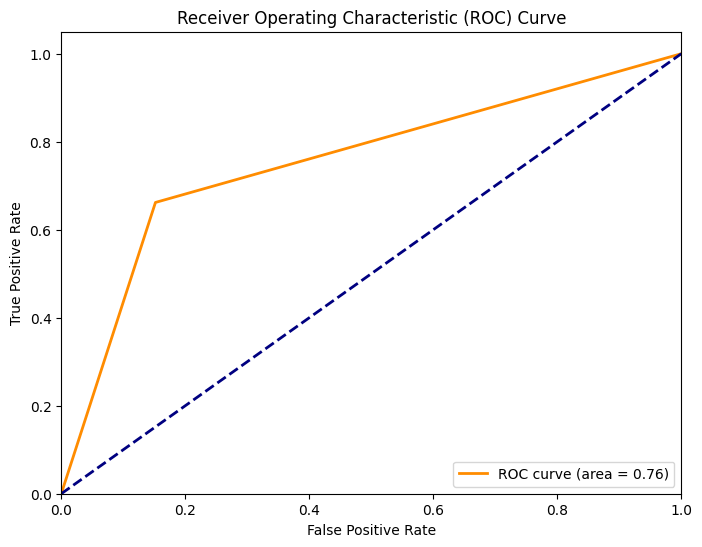

In [16]:
# ROC curve
y_true_tensor = torch.tensor(y_true)
y_pred_tensor = torch.tensor(y_pred).float()
fpr, tpr, thresholds = roc_curve(y_true_tensor, y_pred_tensor)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
